# LightFM Hybrid recommender

LightFM is a Python implementation of a number of popular recommendation algorithms for both implicit and explicit feedback.

It also makes it possible to incorporate both item and user metadata into the traditional matrix factorization algorithms.


## LightFM for the goodreads books dataset

In [14]:
import pandas as pd
import numpy as np

In [9]:
books=pd.read_csv("../input/goodbooks-10k-updated/books.csv")

Some Data exploration before getting recommendations is always a good idea.

In [10]:
books

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


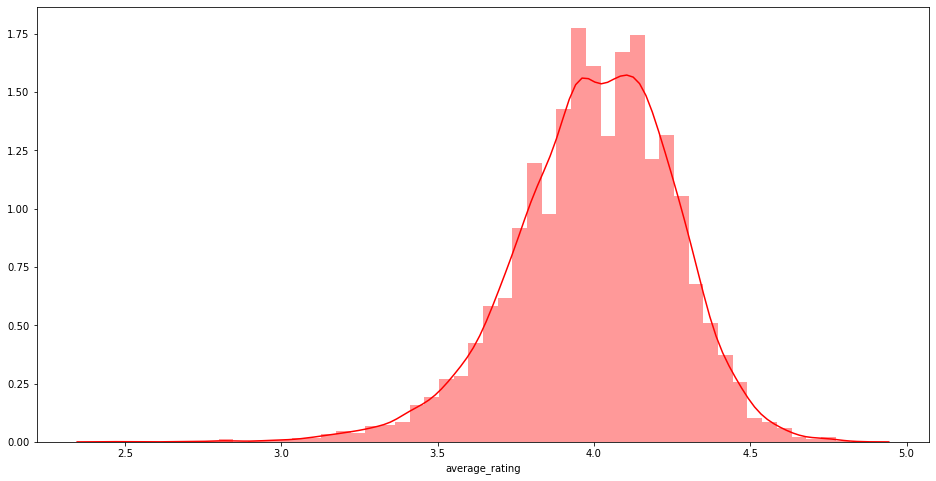

In [15]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.distplot(a=books['average_rating'], kde=True, color='r')

In [18]:
books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

Only selecting important columns.

In [19]:
books_metadata_selected = books[['book_id', 'average_rating', 
'original_publication_year', 'ratings_count', 'language_code']]
books_metadata_selected

,book_id,average_rating,original_publication_year,ratings_count,language_code
0,1,4.34,2008.0,4780653,eng
1,2,4.44,1997.0,4602479,eng
2,3,3.57,2005.0,3866839,en-US
3,4,4.25,1960.0,3198671,eng
4,5,3.89,1925.0,2683664,eng
...,...,...,...,...,...
9995,9996,4.09,2010.0,17204,eng
9996,9997,4.25,1990.0,12582,eng
9997,9998,4.35,1977.0,9421,eng
9998,9999,3.65,2011.0,11279,eng


## Pandas Profiler
 
 Pandas Profiler gives us a summary of the dataset without writing any code. It behaves like the .describe() function.
 Shown below is a sample report. Let us try and generate a sample report for our dataset.
 
![Pandas](https://miro.medium.com/max/1834/1*98WxRgNtUo026F65XTFz1A.png) 

Running it through pandas profiler to understand the data and gather exploratory details. Generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

In [21]:
import pandas_profiling

books_metadata_selected.replace('', np.nan, inplace=True)
profile = pandas_profiling.ProfileReport(books_metadata_selected[['average_rating',
                                                                  'original_publication_year', 'ratings_count']])
profile

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



From the above report it is clear that original_publication_year has missing values which need to be removed.

In [22]:
#rounding the average rating to nearest 0.5 score
books_metadata_selected['average_rating'] = books_metadata_selected['average_rating'].apply(lambda x: round(x*2)/2)

#replacing missing values to the year 
books_metadata_selected['original_publication_year'].replace(np.nan, 2100, inplace=True)

In [23]:
# using pandas qcut method to convert fields into quantile-based discrete intervals
books_metadata_selected['ratings_count'] = pd.qcut(books_metadata_selected['ratings_count'], 25)

In [24]:
profile = pandas_profiling.ProfileReport(books_metadata_selected[['average_rating',
                                                                  'original_publication_year', 'ratings_count']])
profile

In [25]:
#importing ratings data for creating utility matrix
interactions=pd.read_csv("../input/goodbooks-10k-updated/ratings.csv")

Therefore , we now have a csr(compressed sparse row)matrix for selected columns from the ratings file. CSR matrices are basically one hot encodings for a dataframe.

In [26]:
from scipy.sparse import *
from scipy import *
item_dict ={}
df = books[['book_id', 'original_title']].sort_values('book_id').reset_index()
for i in range(df.shape[0]):
    item_dict[(df.loc[i,'book_id'])] = df.loc[i,'original_title']
# dummify categorical features
books_metadata_selected_transformed = pd.get_dummies(books_metadata_selected, columns = ['average_rating','original_publication_year', 'ratings_count', 'language_code'])
books_metadata_selected_transformed = books_metadata_selected_transformed.sort_values('book_id').reset_index().drop('index', axis=1)
books_metadata_selected_transformed.head(5)
# convert to csr matrix
books_metadata_csr = csr_matrix(books_metadata_selected_transformed.drop('book_id', axis=1).values)

In [27]:
user_book_interaction = pd.pivot_table(interactions, index='user_id', columns='book_id', values='rating')
# fill missing values with 0
user_book_interaction = user_book_interaction.fillna(0)
user_id = list(user_book_interaction.index)
user_dict = {}
counter = 0 
for i in user_id:
    user_dict[i] = counter
    counter += 1
# convert to csr matrix
user_book_interaction_csr = csr_matrix(user_book_interaction.values)
user_book_interaction_csr

<53424x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 5976479 stored elements in Compressed Sparse Row format>

### Creating model 

In [28]:
model = LightFM(loss='warp',
                random_state=2016,
                learning_rate=0.90,
                no_components=150,
                user_alpha=0.000005)
model = model.fit(user_book_interaction_csr,
                  epochs=5,
                  num_threads=16, verbose=False)

Number of epochs can affect the running time and also precision.

Recommendations function that maps the user IDs to their titles and generates recommendations using the LSTM model.

In [29]:
def sample_recommendation_user(model, interactions, user_id, user_dict, 
                               item_dict,threshold = 0,nrec_items = 5, show = True):
    
    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items), item_features=books_metadata_csr))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    
    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                 [interactions.loc[user_id,:] > threshold].index).sort_values(ascending=False))
    
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))
    if show == True:
        print ("User: " + str(user_id))
        print("Known Likes:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + str(i))
            counter+=1
    print("\n Recommended Items:")
    counter = 1
    for i in scores:
        print(i)
        print(str(counter) + '- ' + i)
        counter+=1

In [30]:
sample_recommendation_user(model, user_book_interaction, 5, user_dict, item_dict)

User: 5
Known Likes:
1-  Evil at Heart
2- Cop Town
3- Sacred
4- nan
5- A Better World
6- Owen
7- Sweetheart
8- Broken Monsters
9- The Kept Woman
10- Unseen
11- Bittersweet
12- Fourth Grave Beneath My Feet
13- A Hidden Fire
14- Silent Scream
15- Prayers for Rain 
16- A Chair for My Mother 
17- Say Goodbye
18- Beyond Reach
19- My Sweet Audrina
20- Third Grave Dead Ahead
21- The Given Day
22- Politi (Harry Hole, #10)
23- Darkness, Take My Hand
24- Tuesday
25- Fallen
26- nan
27- Knuffle Bunny Too: A Case of Mistaken Identity
28- Wise Blood
29- Second Grave on the Left
30- The One That Got Away
31- Brilliance
32- nan
33- Broken
34- Iced
35- Fractured
36- The Day the Crayons Quit
37- The Last Child
38- Night Broken
39- Gjenferd
40- Suffer the Children
41- Gone, Baby, Gone
42- The Girl In The Ice
43- A Drink Before the War
44- nan
45- Panserhjerte (Harry Hole, #8)
46- The Thousand-Dollar Tan Line
47- The Winter People
48- Sorgenfri
49- Frost Burned
50- The Shining Girls
51- The Tell-Tale Hear

In [31]:
sample_recommendation_user(model, user_book_interaction, 500, user_dict, item_dict)

User: 500
Known Likes:
1- Scaredy Squirrel
2- Love Bites
3- Insatiable
4- In the Night Kitchen
5- nan
6- Magic's Promise
7- Magic's Price
8- Arrow's Flight (Heralds of Valdemar, #2)
9- Magic Steps
10- Street Magic
11- Arrow's Fall
12- By the Sword
13- The Earthsea Trilogy
14- The Lives of Christopher Chant
15- I Want My Hat Back
16- Magic's Pawn
17- So You Want to Be a Wizard
18- Bloody Jack: Being an Account of the Curious Adventures of Mary "Jacky" Faber, Ship's Boy
19- Briar's Book
20- Daja's Book
21- The Uncommon Reader 
22- The Pigeon Finds a Hot Dog!
23- Tris's Book
24- Greenwitch
25- Don't Let the Pigeon Stay Up Late!
26- Hark! A Vagrant
27- Arrows of the Queen (Heralds of Valdemar #1)
28- Dragondrums (Pern: Harper Hall, #3)
29- Sandry's Book
30- The Grey King
31- Silver on the Tree
32- The Castle of Llyr
33- Taran Wanderer
34- Page 
35- Dragonquest
36- Dragonsinger
37- A Spell for Chameleon
38- The White Dragon (Pern: Dragonriders of Pern, #3)
39- Over Sea, Under Stone
40- On a

Thence, the models works pretty well. It generates recommendations according to the score.

This model was a good change from the traditional collaborative and content based filtering and may give precise results if trained and deployed.

# Conclusion


Although there are tons of implementations of recommendation systems on the Internet, all are very confusing. Therefore this notebook is just a simple guide or representation to learn about them. Content based, Collaborative and Hybrid recommendation systems are successfully implemented. Content based recommendations are easy to implement but lack precision. On the other hand, collaborative filtering is a tad bit difficult to implement but gives better results. The LightFM model is a good option too, but i think it is just a complicated implementation of collaborative filtering.

## References:

1. [A very helpful post](https://towardsdatascience.com/recommendation-system-in-python-lightfm-61c85010ce17)
2. [LightFM Documentation](https://making.lyst.com/lightfm/docs/home.html)